T6D2: Restaurant Chain Satisfaction Analysis

Summary Statistics for Each Location:
           count       mean       std        min        25%        50%  \
Location                                                                 
Ann Arbor   30.0  71.809831  8.772646  48.802549  68.240212  72.323797   
Chicago     34.0  74.311393  9.041210  55.124311  68.985604  72.772759   
Green Bay   36.0  75.424200  9.282537  55.403299  70.000474  75.772876   

                 75%        max  
Location                         
Ann Arbor  76.843783  90.380366  
Chicago    80.352369  90.230299  
Green Bay  82.457086  93.522782  

ANOVA is not significant (p-value: 0.2658)


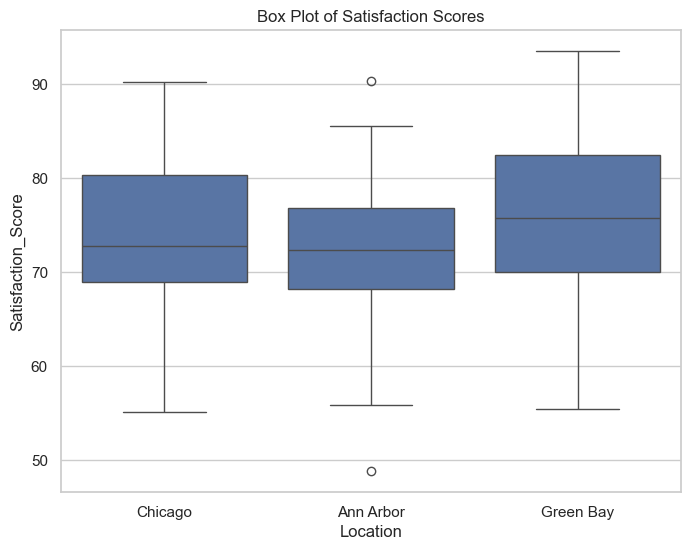

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Define the number of data points and locations
num_data_points = 100
locations = ['Chicago', 'Ann Arbor', 'Green Bay']

# Create random data for satisfaction scores within the range of 1 to 100
np.random.seed(42)
satisfaction_scores = np.random.normal(loc=75, scale=10, size=num_data_points)
satisfaction_scores = np.clip(satisfaction_scores, 1, 100)  # Clip scores to the range [1, 100]

# Create a DataFrame
data = pd.DataFrame({'Location': np.random.choice(locations, num_data_points),
                     'Satisfaction_Score': satisfaction_scores})

# Perform ANOVA
location1_scores = data[data['Location'] == 'Chicago']['Satisfaction_Score']
location2_scores = data[data['Location'] == 'Ann Arbor']['Satisfaction_Score']
location3_scores = data[data['Location'] == 'Green Bay']['Satisfaction_Score']

f_statistic, p_value = f_oneway(location1_scores, location2_scores, location3_scores)

# Create a box plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x="Location", y="Satisfaction_Score", data=data)
plt.title(f'Box Plot of Satisfaction Scores')


# Create a summary table
summary_table = data.groupby('Location')['Satisfaction_Score'].describe()

# Function to check if p-value is significant
def is_significant(p_value, alpha=0.05):
    return p_value < alpha

# Check if the p-value is significant at a significance level of 0.05
significant = is_significant(p_value)

print("Summary Statistics for Each Location:")
print(summary_table)

if significant:
    print(f"\nANOVA is significant (p-value: {p_value:.4f})")
else:
    print(f"\nANOVA is not significant (p-value: {p_value:.4f})")

plt.show()
